In [2]:
#Character date to date

from datetime import datetime
char_date = 'Apr 01 2015 01:20 PM' #creating example character date
date_obj = datetime.strptime(char_date, '%b %d %Y %I:%M %p')
print(date_obj)

2015-04-01 13:20:00


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("train_loan.csv", index_col="Loan_ID")

In [4]:
#Boolean Indexing

data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [5]:
# Apply Function

#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(data.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [109]:
# Imputing Missing Values

#First we import a function to determine the mode

#from scipy.stats import mode

import statistics

statistics.mode(data['Gender'])

'Male'

In [110]:
#Impute the values:
data['Gender'].fillna(statistics.mode(data['Gender']), inplace=True)
data['Married'].fillna(statistics.mode(data['Married']), inplace=True)
data['Self_Employed'].fillna(statistics.mode(data['Self_Employed']), inplace=True)

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [111]:
# Pivot Table

#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [112]:
# Pivot Table

#Determine pivot table
impute_grps2 = data.pivot_table(values=["LoanAmount"], index=["Gender"],columns=["Married","Self_Employed"], aggfunc=np.mean)
print(impute_grps2)

               LoanAmount                                    
Married                No                     Yes            
Self_Employed          No         Yes          No         Yes
Gender                                                       
Female         114.691176  125.800000  134.222222  282.250000
Male           129.936937  180.588235  153.882736  169.395833


In [113]:
#Multi Indexing

#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [32]:
# CrossTab

pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [34]:
def percConvert(ser):
  return ser/float(ser[-1])

pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [35]:
# Merge Dataframes

prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [36]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


In [37]:
# Sorting

data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


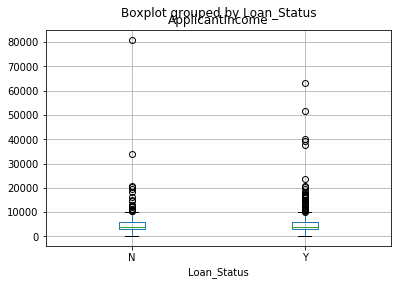

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000152FCE69550>,
      dtype=object)

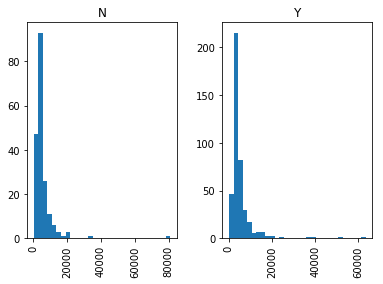

In [39]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

In [40]:
# Coding Nominal Data

#Define a generic function using Pandas replace function

def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:

print('Before Coding:')
print(pd.value_counts(data["Loan_Status"]))

data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})

print('\nAfter Coding:')
print(pd.value_counts(data["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


In [46]:
# Cut Function for Binning

#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
    minval = col.min()
    maxval = col.max()

  #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    print(break_points)

  #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print(pd.value_counts(data["LoanAmount_Bin"], sort=False))

[9.0, 90, 140, 190, 700.0]
low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64


In [47]:
# Iterating over rows

#Check current type:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Loan_Status_Coded       int64
LoanAmount_Bin       category
dtype: object

In [53]:
#Load the file:
colTypes = pd.read_csv('datatypes.csv')
print(colTypes)

              feature         type
0              Gender  categorical
1             Married  categorical
2          Dependents  categorical
3           Education  categorical
4       Self_Employed  categorical
5     ApplicantIncome   continuous
6   CoapplicantIncome   continuous
7          LoanAmount   continuous
8    Loan_Amount_Term   continuous
9      Credit_History  categorical
10      Property_Area  categorical
11        Loan_Status  categorical


In [54]:
#Iterate through each row and assign variable type.
#Note: astype is used to assign types

for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        data[row['feature']]=data[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        data[row['feature']]=data[row['feature']].astype(np.float)
print(data.dtypes)

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
Loan_Status_Coded       int64
LoanAmount_Bin       category
dtype: object


In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv("survey.csv")
num_columns = len(df.columns)
pd.set_option("display.max_columns", num_columns)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [77]:
feature_names = df.columns.tolist()
feature_names.remove('Timestamp')
feature_names.remove('comments')

for column in feature_names:
    print(column)
    print(df[column].value_counts(dropna=False))

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1      

In [70]:
features = df.drop('treatment', 1)
labels = df['treatment']

In [72]:
feature_namess = features.columns.tolist()
feature_namess.remove('Timestamp')
feature_namess.remove('comments')
for column in feature_namess:
    print(column)
    print(df[column].value_counts(dropna=False))

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1      

In [76]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [78]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(features) 
features = imputer.transform(features)

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: could not convert string to float: 'Bipolar disorder '

In [61]:
features.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [62]:
male_terms = ["male", "m", "mal", "msle", "malr", "mail", "make", "cis male", "man", "maile", "male (cis)", "cis man"]

female_terms = ["female", "f", "woman", "femake", "femaile", "femake", "cis female", "cis-female/femme", "female (cis)", "femail", "cis woman"]

def clean_gender(response):
    if response.lower().rstrip() in male_terms:
        return "Male"
    elif response.lower().rstrip() in female_terms:
        return "Female"
    else: 
        return "Other"

df['Gender'] = df["Gender"].apply(lambda x: clean_gender(x))

In [64]:
df['Gender'].value_counts()

Male      990
Female    247
Other      22
Name: Gender, dtype: int64

C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


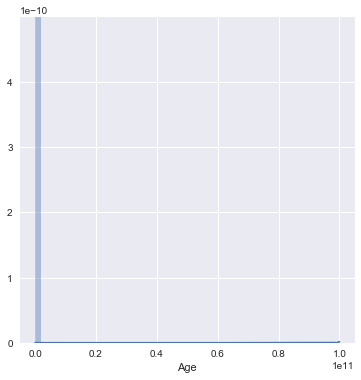

In [79]:
%matplotlib inline  
import seaborn as sns
sns.set(color_codes=True)
plot = sns.distplot(df.Age.dropna())
plot.figure.set_size_inches(6,6)

In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()  
ohe = OneHotEncoder(categorical_features = ['leave']) 
label_encoded_data = label_encoder.fit_transform(features['leave'])
ohe.fit_transform(label_encoded_data.reshape(-1,1))

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


IndexError: arrays used as indices must be of integer (or boolean) type

In [84]:
label_encoded_data.reshape(-1,1)

array([[2],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [85]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['leave'])
label_encoder.transform(df['leave'])

array([2, 0, 1, ..., 1, 0, 0])

In [86]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [87]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = iris.iloc[:,0:4]
Y = iris.iloc[:,-1]
names = iris.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

NameError: name 'iris' is not defined

C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


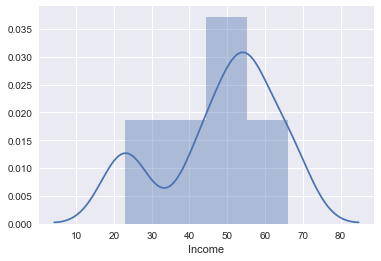

In [92]:
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.DataFrame({'Income': [54,23,44,55,66],
                   'Population':[77,88,87,88,89],
                   'Number':[1,1,0,0,1],
                   'Category':['A','A','B','B','C']})

### Univariate analysis
sns.distplot(df.Income) # numeric


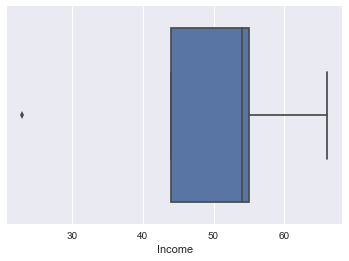

In [93]:
sns.boxplot(df.Income) # numeric


C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


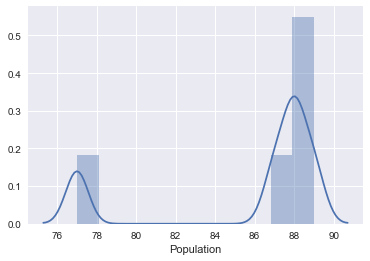

In [94]:
sns.distplot(df.Population)


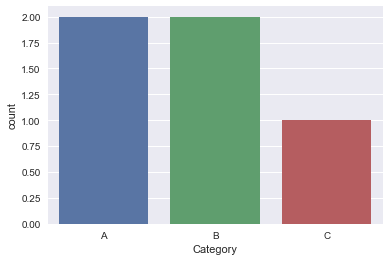

In [95]:
sns.countplot(df.Category) # categorical


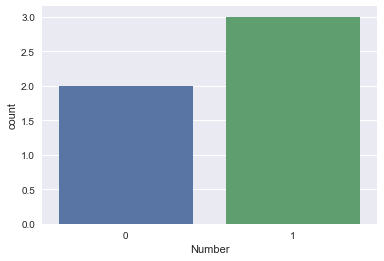

In [96]:
sns.countplot(df.Number)


C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


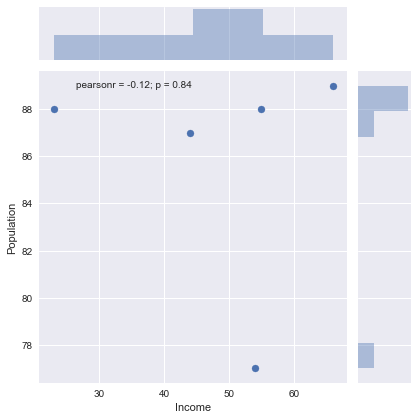

In [97]:

## Bivariate analysis
sns.jointplot('Income', 'Population', data = df, kind='scatter')


In [98]:
sns.lmplot(df.Income, df.Population, data=df, hue='Number', fit_reg=False)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

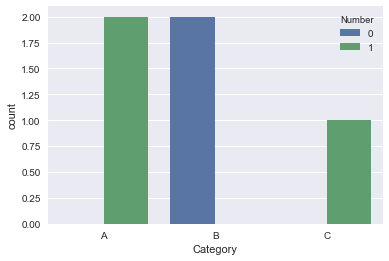

In [101]:
sns.countplot(df.Category, hue = 'Number', data=df)

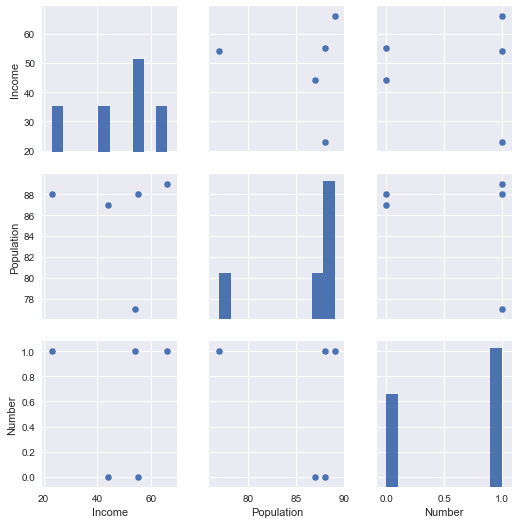

In [103]:
## Multivariate analysis
sns.pairplot(df)

In [2]:
?df.pivot

Object `df.pivot` not found.


In [3]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
a = [1, 1, 2, 3, 4]
b = [2, 2, 3, 2, 1]
c = [4, 6, 7, 8, 9]
d = [4, 3, 4, 5, 4]

In [5]:
ck = np.column_stack([a, b, c, d])

vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
print(vif)

[47.136986301369774, 28.93150684931508, 80.31506849315096, 40.43835616438355]


In [12]:
for i in range(ck.shape[1]):
    print(variance_inflation_factor(ck, i))

47.136986301369774
28.93150684931508
80.31506849315096
40.43835616438355


In [9]:
ck

array([[1, 2, 4, 4],
       [1, 2, 6, 3],
       [2, 3, 7, 4],
       [3, 2, 8, 5],
       [4, 1, 9, 4]])

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.DataFrame(
    {'a': [1, 1, 2, 3, 4],
     'b': [2, 2, 3, 2, 1],
     'c': [4, 6, 7, 8, 9],
     'd': [4, 3, 4, 5, 4]})

X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const    136.875
a         22.950
b          3.000
c         12.950
d          3.000
dtype: float64

In [ ]:
# Calculating Q1 for each column

Q1 = petroldf.quantile(0.25)

# Calculating Q3 for each column

Q3 = petroldf.quantile(0.75)

# calculating interquartileregion (IQR) for each column

IQR = Q3-Q1

# Identifying & Printing outliers

petroldf_ol = petroldf[(petroldf < (Q1-1.5*IQR)) | (petroldf > (Q3+1.5*IQR))]

petroldf_ol.dropna(how='all') # Prints only the rows with outlier values (non NaN values in the below result are outliers)

In [ ]:
# Removing Outliers from the dataset

petroldf_wol = petroldf[~((petroldf < (Q1 - 1.5 * IQR)) |(petroldf > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Shape of the dataset without outliers: {petroldf_wol.shape}') # 43 rows remain after deleting 5 rows : 5,11,18,36,39
print('\nDataset without outliers:')
petroldf_wol